In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import scipy as sci
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('cleaned_tweets_data.csv',index_col=0)
df.head()


,clean_text,airline_sentiment
0,virginamerica dhepburn said,1
1,virginamerica plus added commercials experienc...,2
2,virginamerica today must mean need take anothe...,1
3,virginamerica really aggressive blast obnoxiou...,0
4,virginamerica really big bad thing,0


In [3]:
x = df['clean_text']
y = df['airline_sentiment']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=25)

In [5]:
tfidf_vect = TfidfVectorizer()
x_train = tfidf_vect.fit_transform(x_train)   
x_test = tfidf_vect.transform(x_test)    #We always fit transform train data but transform test data

In [6]:
x_train = sci.sparse.csr_matrix.todense(x_train)
x_test = sci.sparse.csr_matrix.todense(x_test)

In [7]:
x_train.shape

(10980, 11538)

In [9]:
model = Sequential([
    Dense(12000,activation='relu',input_shape = (x_train.shape[1],)),
    Dense(5000,activation='relu'),
    Dense(3000,activation='relu'),
    Dense(3,activation='softmax')    
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12000)             138468000 
                                                                 
 dense_1 (Dense)             (None, 5000)              60005000  
                                                                 
 dense_2 (Dense)             (None, 3000)              15003000  
                                                                 
 dense_3 (Dense)             (None, 3)                 9003      
                                                                 
Total params: 213,485,003
Trainable params: 213,485,003
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(x_train,y_train,batch_size=500, epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
22/22 [==============================] - 414s 15s/step - loss: 0.8219 - accuracy: 0.6070 - val_loss: 0.6675 - val_accuracy: 0.6732
Epoch 2/10
22/22 [==============================] - 227s 10s/step - loss: 0.4506 - accuracy: 0.8527 - val_loss: 0.7189 - val_accuracy: 0.7765
Epoch 3/10
22/22 [==============================] - 172s 8s/step - loss: 0.1235 - accuracy: 0.9618 - val_loss: 0.9201 - val_accuracy: 0.7719
Epoch 4/10
22/22 [==============================] - 193s 9s/step - loss: 0.0433 - accuracy: 0.9879 - val_loss: 0.9863 - val_accuracy: 0.7784
Epoch 5/10
22/22 [==============================] - 169s 8s/step - loss: 0.0235 - accuracy: 0.9924 - val_loss: 1.0611 - val_accuracy: 0.7790
Epoch 6/10
22/22 [==============================] - 169s 8s/step - loss: 0.0178 - accuracy: 0.9935 - val_loss: 1.0631 - val_accuracy: 0.7762
Epoch 7/10
22/22 [==============================] - 170s 8s/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 1.0939 - val_accuracy: 0.7787
Epoch 8/10


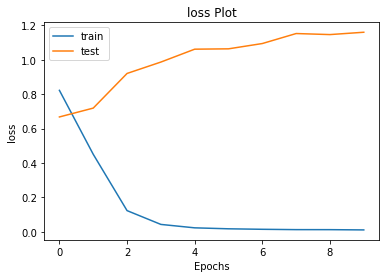

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('loss Plot')
plt.legend(['train','test'])

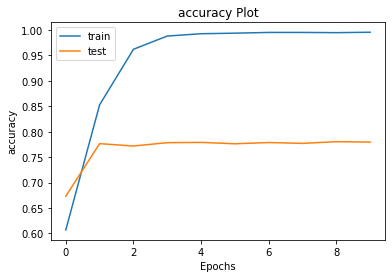

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('accuracy Plot')
plt.legend(['train','test'])